In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd

from data_loading import load_annotated_6k_collection, load_DNA_binding_domains


genes = load_annotated_6k_collection()
dbd = load_DNA_binding_domains()

100%|██████████| 979/979 [01:27<00:00, 11.14it/s]


1845 221 8.34841628959276 (0.0, 1.0)


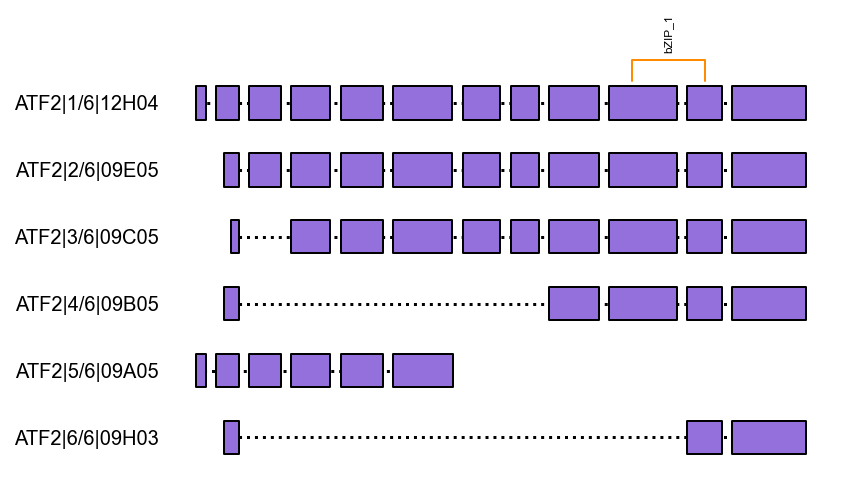

In [60]:
genes['ATF2'].exon_diagram(intron_nt_space=30)

2227 904 2.463495575221239 (0.0, 1.0)
2227 161 13.832298136645962 (0.0, 1.0)
2227 86 25.8953488372093 (0.0, 1.0)
2227 278 8.010791366906474 (0.0, 1.0)
2227 215 10.35813953488372 (0.0, 1.0)


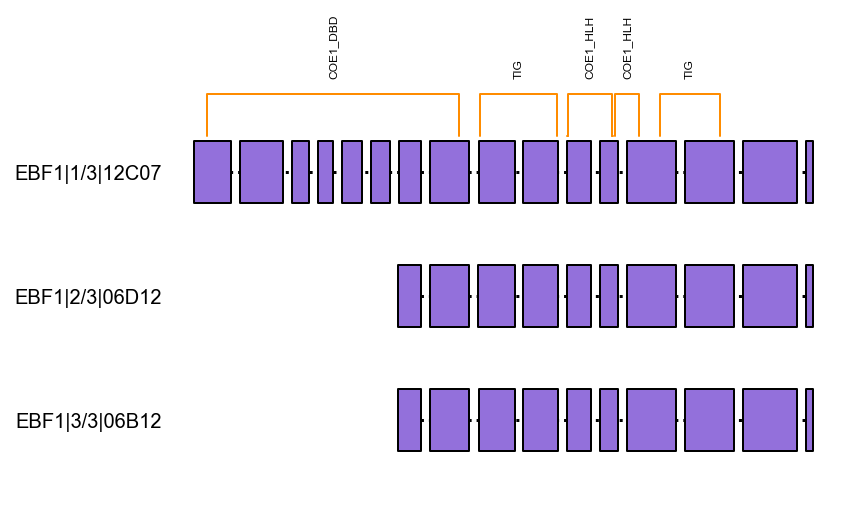

In [62]:
genes['EBF1'].exon_diagram(intron_nt_space=30, draw_domains=True)

In [42]:
genes['EBF1']['EBF1|1/3|12C07'].aa_seq_features

[Pfam_domain: PF16422 COE1_DBD 17-247,
 Pfam_domain: PF16423 COE1_HLH 347-390,
 Pfam_domain: PF16423 COE1_HLH 394-412,
 Pfam_domain: PF01833 TIG 262-344,
 Pfam_domain: PF01833 TIG 438-499]

In [39]:
genes['E2F3']['E2F3|2/4|10A08'].aa_seq_features

[Pfam_domain: PF16421 E2F_CC-MB 134-227,
 Pfam_domain: PF02319 E2F_TDP 54-118,
 Pfam_domain: PF02319 E2F_TDP 130-170]

In [5]:
df = pd.concat([g.aa_feature_disruption(g.orfs[0].name) for g in genes.values()])
df.head()

,accession,alt_iso,deletion,frameshift,gene,insertion,length,ref_iso
0,PF00651,ZBTB18|2/2|12E05,0.0,0.0,ZBTB18,0.0,108.0,ZBTB18|1/2|04E08
1,PF13465,ZBTB18|2/2|12E05,0.0,0.0,ZBTB18,0.0,17.0,ZBTB18|1/2|04E08
2,PF13465,ZBTB18|2/2|12E05,0.0,0.0,ZBTB18,0.0,34.0,ZBTB18|1/2|04E08
3,PF13465,ZBTB18|2/2|12E05,0.0,0.0,ZBTB18,0.0,26.0,ZBTB18|1/2|04E08
4,PF13465,ZBTB18|2/2|12E05,0.0,0.0,ZBTB18,0.0,26.0,ZBTB18|1/2|04E08


In [8]:
genes['ATF2'].aa_feature_disruption('ATF2|1/6|12H04')

,gene,ref_iso,alt_iso,accession,deletion,insertion,frameshift,length
0,ATF2,ATF2|1/6|12H04,ATF2|2/6|09E05,PF00170,0,0,0,64
1,ATF2,ATF2|1/6|12H04,ATF2|3/6|09C05,PF00170,0,0,0,64
2,ATF2,ATF2|1/6|12H04,ATF2|4/6|09B05,PF00170,0,0,0,64
3,ATF2,ATF2|1/6|12H04,ATF2|5/6|09A05,PF00170,64,0,0,64
4,ATF2,ATF2|1/6|12H04,ATF2|6/6|09H03,PF00170,46,0,0,64


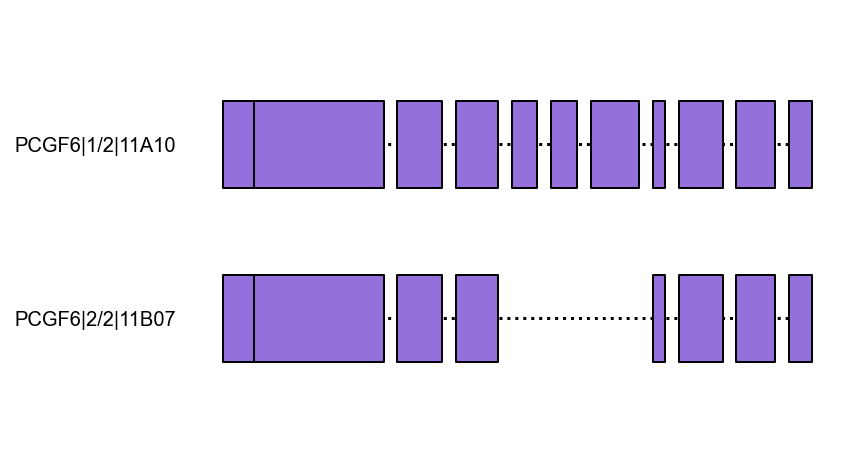

In [173]:
genes['PCGF6'].exon_diagram()

In [174]:
# PCGF6|1/2|11A10, PCGF6|2/2|11B07
genes['PCGF6']['PCGF6|1/2|11A10'].aa_seq_features

[Pfam_domain: PF13923 zf-C3HC4_2 135-174, Pfam_domain: PF16207 RAWUL 277-328]

In [176]:
# 'ZNF655|2/6|12G07', 'ZNF655|3/6|03B05', 'ZNF655|4/6|03C06'

# problem is:
# ZNF655|1/6|03H03 ZNF655|2/6|12G07 512 526
# 526 is not in list
#genes['ZNF655'].aa_feature_disruption('ZNF655|1/6|03H03')
g = genes['PCGF6']
ref = 'PCGF6|1/2|11A10'
alt = 'PCGF6|2/2|11B07'

algn = g.pairwise_changes_relative_to_reference(ref, alt)
algn
print('alignment length', len(algn))
print('deletion length', algn.count('D'))
print('ref length', len(g[ref].residues))
print('alt length', len(g[alt].residues))
algn

alignment length 350
deletion length 75
ref length 350
alt length 275


'MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM'

In [187]:
print(len(algn.replace('I', '')))
print(len(g[ref].nt_seq) / 3)
print(len(g[ref].aa_seq))
print(len(g[ref].residues))

350
353.0
352
350


In [186]:
print(ref)
print(len(g[ref].nt_seq))
print(sum(len(e) for e in g[ref].exons))

PCGF6|1/2|11A10
1059
1050


In [190]:
print(sorted([(e.start, e.end) for e in g[ref].exons]))

[(103303907, 103303961), (103314185, 103314272), (103326533, 103326632), (103333924, 103333952), (103345023, 103345132), (103347237, 103347297), (103347394, 103347450), (103348715, 103348812), (103348899, 103348999), (103350706, 103350997), (103350997, 103351066)]


In [180]:
g[ref].aa_seq

'MEGVAVVTAGSVGAAKTEGAAALPPPPPPPVSPPALTPAPAAGEEGPAPLSETGAPGCSGSRPPELEPERSLGRFRGRFEDEDEELEEEEELEEEEEEEEEDMSHFSLRLEGGRQDSEDEEERLINLSELTPYILCSICKGYLIDATTITECLHTFCKSCIVRHFYYSNRCPKCNIVVHQTQPLYNIRLDRQLQDIVYKLVINLEEREKKQMHDFYKERGLEVPKPAVPQPVPSSKGRSKKVLESVFRIPPELDMSLLLEFIGANEGTGHFKPLEKKFVRVSGEATIGHVEKFLRRKMGLDPACQVDIICGDHLLEQYQTLREIRRAIGDAAMQDGLLVLHYGLVVSPLKIT'

In [181]:
g[ref].nt_seq

'ATGGAGGGGGTCGCGGTGGTGACGGCGGGCAGCGTAGGCGCTGCCAAAACCGAGGGAGCTGCAGCCTTGCCGCCTCCGCCTCCGCCTCCTGTCTCCCCGCCCGCCCTCACCCCTGCACCCGCAGCGGGTGAGGAGGGACCGGCGCCTCTGTCTGAGACGGGGGCTCCCGGCTGCTCCGGCTCCCGGCCCCCTGAGCTGGAGCCGGAGCGCAGCCTGGGCCGCTTCAGAGGCCGCTTCGAGGACGAGGACGAGGAGTTGGAAGAAGAAGAGGAGCTGGAGGAGGAAGAAGAGGAGGAGGAGGAGGACATGAGTCACTTCTCGTTGAGGCTGGAGGGAGGCCGGCAGGACTCGGAGGACGAGGAGGAGCGCCTGATTAATCTCTCTGAGCTGACCCCATACATCTTGTGTTCCATTTGCAAAGGTTACTTAATAGATGCAACTACCATCACAGAATGTCTTCATACCTTTTGTAAAAGCTGCATCGTAAGACATTTTTACTACAGCAACAGATGTCCAAAATGCAATATAGTAGTACATCAGACACAACCTCTTTATAACATAAGGTTGGACCGACAGTTACAAGACATAGTGTACAAATTAGTGATCAATCTAGAGGAAAGAGAAAAAAAGCAAATGCATGATTTCTATAAAGAAAGAGGTCTAGAAGTACCTAAACCTGCTGTTCCACAGCCAGTCCCTTCAAGCAAAGGAAGATCTAAAAAAGTCCTAGAATCAGTGTTTCGTATTCCACCTGAACTTGATATGTCTTTATTACTGGAGTTCATTGGTGCTAATGAAGGCACGGGACATTTTAAGCCATTGGAAAAGAAGTTTGTTCGAGTTTCAGGAGAAGCAACTATTGGACATGTAGAAAAATTCCTCAGAAGAAAAATGGGTCTTGATCCAGCTTGTCAGGTAGATATAATCTGTGGTGATCACCTGTTGGAGCAGTATCAAACTCTAAGGGAAATCCGACGTGCAATAGGTGATGCAGCAATG

In [121]:
algn = genes['PAX7'].pairwise_changes_relative_to_reference('PAX7|1/4|12G08', 'PAX7|2/4|03C09')

In [122]:
algn

'MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMIDIIMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMDIDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'

In [148]:
genes['PAX7']['PAX7|1/4|12G08'].residues[149].aa

'S'

In [146]:
genes['PAX7']['PAX7|2/4|03C09'].residues[153].aa

'S'

In [87]:
genes['PAX7']['PAX7|2/4|03C09'].aa_seq[150:]

'GLVSSISRVLRIKFGKKEEEDEADKKEDDGEKKAKHSIDGILGDKGNRLDEGSDVESEPDLPLKRKQRRSRTTFTAEQLEELEKAFERTHYPDIYTREELAQRTKLTEARVQVWFSNRRARWRKQAGANQLAAFNHLLPGGFPPTGMPTLPPYQLPDSTYPTTTISQDGGSTVHRPQPLPPSTMHQGGLAAAAAAADTSSAYGARHSFSSYSDSFMNPAAPSNHMNPVSNGLSPQVMSILGNPSAVPPQPQADFSISPLHGGLDSATSISASCSQRADSIKPGDSLPTSQAYCPPTYSTTGYSVDPVAGYQYGQYGQTAVDYLAKNVSLSTQRRMKLGEHSAVLGLLPVETGQAY'

In [69]:
len(algn.replace('I', ''))

517

In [70]:
len(genes['PAX7']['PAX7|1/4|12G08'].aa_seq)

518

In [71]:
len(genes['PAX7']['PAX7|1/4|12G08'].residues)

518

In [74]:
len('MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM')

150

In [88]:
genes['PAX7']['PAX7|1/4|12G08'].aa_seq[150:]

'VSSISRVLRIKFGKKEEEDEADKKEDDGEKKAKHSIDGILGDKGNRLDEGSDVESEPDLPLKRKQRRSRTTFTAEQLEELEKAFERTHYPDIYTREELAQRTKLTEARVQVWFSNRRARWRKQAGANQLAAFNHLLPGGFPPTGMPTLPPYQLPDSTYPTTTISQDGGSTVHRPQPLPPSTMHQGGLAAAAAAADTSSAYGARHSFSSYSDSFMNPAAPSNHMNPVSNGLSPQVMSILGNPSAVPPQPQADFSISPLHGGLDSATSISASCSQRADSIKPGDSLPTSQAYCPPTYSTTGYSVDPVAGYQYGQYGQSECLVPWASPVPIPSPTPRASCLFMESYKVVSGWGMSISQMEKLKSSQMEQFT'

In [118]:
genes['PAX7']['PAX7|1/4|12G08'].residues[150].coords

(18635239, 18636242, 18636243)

In [120]:
genes['PAX7'].strand

'+'

In [160]:
# DEBUG
alignment = ''
self = genes['PAX7']
print('strand: ', self.strand)
ref_iter = iter(genes['PAX7']['PAX7|1/4|12G08'].residues[149:152])
alt_iter = iter(genes['PAX7']['PAX7|2/4|03C09'].residues[149:154])
ref_res = next(ref_iter)
alt_res = next(alt_iter)
while True:
    print()
    print(alignment)
    print('Reference: ', ref_res.coords)
    print('Alternative: ', alt_res.coords)
    if not any(i in ref_res.coords for i in alt_res.coords):
        if ((self.strand == '+' and ref_res.coords[2] < alt_res.coords[2])
            or (self.strand == '-' and ref_res.coords[2] > alt_res.coords[2])):
            print('No match: deletion')
            alignment += 'D'
            try:
                ref_res = next(ref_iter)
            except StopIteration:
                alignment += 'I'  # since alt_iter was incremented
                for _remaining in alt_iter:
                    alignment += 'I'
                break
        else:
            print('No match: insertion')
            alignment += 'I'
            try:
                alt_res = next(alt_iter)
            except StopIteration:
                alignment += 'D'  # since ref_iter was incremented
                for _remaining in ref_iter:
                    alignment += 'D'
                break
    else:
        if ref_res.coords == alt_res.coords:
            print('all match')
            alignment += 'M'
        elif any(i == j for i, j in zip(ref_res.coords, alt_res.coords)):
            # Different exon junctions
            if ref_res.aa == alt_res.aa:
                print('partially overlapping codons, same residue')
                alignment += 'M'
            else:
                print('partially overlapping codons, different residue')
                if ((ref_res.coords[0] < alt_res.coords[0] and self.strand == '+')
                    or (ref_res.coords[2] > alt_res.coords[2] and self.strand == '+')
                    or (ref_res.coords[0] > alt_res.coords[0] and self.strand == '-')
                    or (ref_res.coords[2] < alt_res.coords[2] and self.strand == '-')):
                    alignment += 'I'
                    try:
                        alt_res = next(alt_iter)
                        continue
                    except StopIteration:
                        alignment += 'D'  # since ref_iter was incremented
                        for _remaining in ref_iter:
                            alignment += 'D'
                        break
                elif ((ref_res.coords[0] > alt_res.coords[0] and self.strand == '+')
                        or (ref_res.coords[2] < alt_res.coords[2] and self.strand == '+')
                        or (ref_res.coords[0] < alt_res.coords[0] and self.strand == '-')
                        or (ref_res.coords[2] > alt_res.coords[2] and self.strand == '-')):
                    alignment += 'D'
                    try:
                        ref_res = next(ref_iter)
                        continue
                    except StopIteration:
                        alignment += 'I'  # since alt_iter was incremented
                        for _remaining in alt_iter:
                            alignment += 'I'
                        break
                else:  # Here just the middle nt in codon matched
                    msg = 'Unexpected alignement issue between: '
                    msg += ref_iso_name + ' and ' + alt_iso_name
                    raise UserWarning(msg)
        else:  # Frameshift
            if any(ref_res.coords[i] == alt_res.coords[(i + 1) % 3] for i in range(3)):
                alignment += 'F'
            else:
                alignment += 'f'

        try:
            ref_res = next(ref_iter)
        except StopIteration:
            for _remaining in alt_iter:
                alignment += 'I'
            break
        try:
            alt_res = next(alt_iter)
        except StopIteration:
            alignment += 'D'  # since we incremented above already
            for _remaining in ref_iter:
                alignment += 'D'
            break
alignment  # looking for MIIMM

strand:  +


Reference:  (18635236, 18635237, 18635238)
Alternative:  (18635236, 18635237, 18635238)
all match

M
Reference:  (18635239, 18636242, 18636243)
Alternative:  (18635239, 18636236, 18636237)
partially overlapping codons, different residue

MI
Reference:  (18635239, 18636242, 18636243)
Alternative:  (18636238, 18636239, 18636240)
No match: insertion

MII
Reference:  (18635239, 18636242, 18636243)
Alternative:  (18636241, 18636242, 18636243)
partially overlapping codons, same residue

MIIM
Reference:  (18636244, 18636245, 18636246)
Alternative:  (18636244, 18636245, 18636246)
all match


'MIIMM'

In [ ]:
# residue 150 final codon off

In [ ]:
# residue 150 

In [58]:
algn.count('M')

116

In [59]:
len('LPRPFWVQKTCIWAVDSCK')

19

In [60]:
algn.count('I')

19

In [61]:
len('ESEKLESVNAELKAQIEELKNEKQHLIYMLNLHRPTCIVRAQNGRTPEDERNLFIQQIKEGTLQS')

65

In [62]:
algn.count('D')

65

TypeError: set_yticks() got an unexpected keyword argument 'weight'

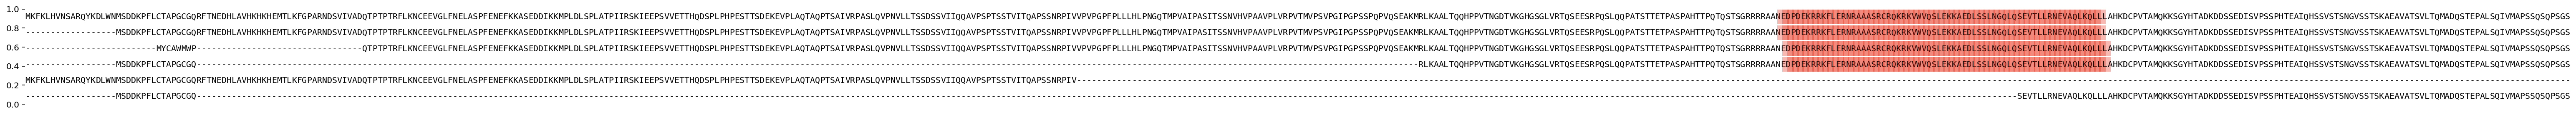

In [7]:
# this will no longer work as is
def domain_alignment_isoforms_figure(tracks, doms, file_name):

    def _is_in_domain(i, doms):
        """i is 1-indexed"""
        if doms is None:
            return False
        else:
            for dom in doms:
                if i >= dom[0] and i <= dom[1]:
                    return True
            return False

    fig, ax = plt.subplots(1, 1)
    n_iso = len(tracks)
    len_alignment = len(list(tracks.values())[0])
    fig.set_size_inches(len_alignment * 0.108, n_iso * 0.35)
    for i_iso, (iso_id, aligned_seq) in enumerate(tracks.items()):
        
        # change to boxes instead of background
        # somehow have to force text to be length of axis

        for i_align, letter in enumerate(aligned_seq):
            if letter != '-':
                in_dom = _is_in_domain(transform_coords_genomic_alignment_of_aa_seqs_to_aa_seq(i_align, tracks, iso_id), 
            dom_pos.get(iso_id, None))
            else:
                in_dom = False
            ax.text(i_align * (1 / len_alignment),
                    1 - (i_iso + 0.5) / n_iso,
                    letter,
                    family='monospace',
                    fontsize=10,
                    verticalalignment='center',
                    horizontalalignment='left',
                    bbox={'facecolor': (0.9, 0.1, 0., 0.3) if in_dom else 'none',
                        'edgecolor': 'none'})
    for s in ax.spines.values():
        s.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([(i + 0.5) / n_iso for i in range(n_iso)],
                   weight='bold')
    ax.yaxis.set_tick_params(length=0)
    ax.set_yticklabels(reversed(list(tracks.keys())))
    plt.savefig('../../figures/' + file_name, bbox_inches='tight')


dom_pos = pfam.loc[pfam['query name'].str.contains('ATF2') & 
                   pfam['pfam_ac'].isin(dbd['pfam'].values) &
                   (pfam['pfam_ac'] == 'PF00170'), 
                   ['query name', 'env_coord_from', 'env_coord_to']].values
dom_pos = {a[0]: [(a[1], a[2])] for a in dom_pos}
domain_alignment_isoforms_figure(tracks,
                                 dom_pos,
                                 file_name='test_alignment.pdf')

In [ ]:
gene_name = 'FOXP3'
gene = gene_object_from_6k(gene_name)
tracks = genomic_alignment_of_aa_seqs(gene)
dom_pos = pfam.loc[pfam['query name'].str.contains(gene_name) & 
                   pfam['pfam_ac'].isin(dbd['pfam'].values), 
                   ['query name', 'env_coord_from', 'env_coord_to']].values
dom_pos = {a[0]: [(a[1], a[2])] for a in dom_pos}
domain_alignment_isoforms_figure(tracks,
                                 dom_pos,
                                 file_name='test_alignment_' + gene_name + '.pdf')

In [ ]:
orf_id = 'ATF2|1/6|12H04'
for orf_id in dom_pos.keys():
    print(tracks[orf_id].replace('-', '')[dom_pos[orf_id][0][0] -1:dom_pos[orf_id][0][1]])